In [152]:
import math
import matplotlib.pyplot as plt

from Helpers import loadData, saveData, medi, axialNormalization, sharpen

In [ ]:
# Load data file
data = loadData(r'/home/snow/Coding/Granular-Compression/Data','downscale_17.hdf5')

<KeysViewHDF5 ['default']>


In [ ]:
# Apply 3d median filter to remove salt and pepper 
medData = medi(data)

In [ ]:
# Take normalization along an axis and apply gaussian filter
normedData = axialNormalization(medData, 'c')
sharpData = sharpen(normedData)

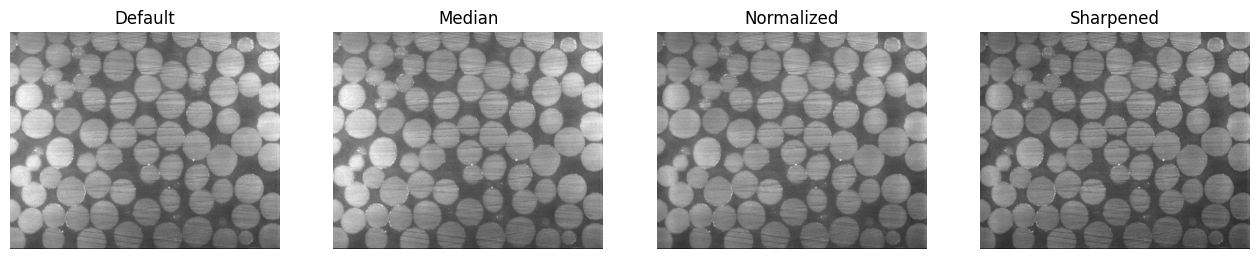

In [156]:
# Plot process
fig, axs = plt.subplots(1, 4, figsize=(16, 4)) 
ax1,ax2,ax3,ax4 = axs.flatten()
loc = math.floor(len(data[0,0,:])/2)

ax1.imshow(data[:, :, loc], cmap='gray')
ax2.imshow(medData[:, :, loc], cmap='gray')
ax3.imshow(normedData[:, :, loc], cmap='gray')
ax4.imshow(sharpData[:, :, loc], cmap='gray')

ax1.set_title('Default')
ax2.set_title('Median')
ax3.set_title('Normalized')
ax4.set_title('Sharpened')

for ax in axs:
    ax.axis('off')

plt.show()

In [ ]:
# Save processed data for later use
loc = r'/home/snow/Coding/Granular-Compression/Data'
name = 'processedDown_17.hdf5'

saveData(sharpData,location=loc,saveName=name)